### theory 

```
1. 중심들(클러스터의 수만큼)의 초기 값을 결정한다.

2. 가까운 클러스터에 데이터를 할당한다.

3. 각 클러스터에 대해 새로운 중심을 계산한다. 

주어진 데이터를 k개의 클러스터로 묶는 알고리즘으로, 각 클러스터 차이의 분산을 차ㅣ소화하는 방식으로 동작한다.
```

### 장점

```
1)탐색적인 기법

- 군집분석은 그 자체가 대용량 데이터에 대한 탐색적 인 기법으로서, 주어진 데이터의 내부구조에 대한 사 전적인 정보 없이 의미 있는 자료구조를 찾아낼 수 있는 방법


2)다양한 형태의 데이터에 적용 가능

- 분석을 위해서는 기본적으로 관찰치 간의 거리를 데 이터형태에 맞게만 정의하면, 거의 모든 형태의 데이 터에 대하여 적용이 가능한 방법


3)분석방법의 적용 용이성

- 대부분의 군집방법이 분석대상 데이터에 대해 사전정 보를 거의 요구하지 않음 적용 유리 즉, 모형화를 위한 분석과 같이 사전에 특정 변수에 대한 역할 정의가 필요하지 않고 다만 관찰치 들 사 이의 거리만이 분석에 필요한 입력자료로 사용.

```


### 단점

```
1)가중치와 거리 정의

- 군집분석의 결과는 관찰치 사이의 비 유사성인 거리 또는 유사성을 어떻게 정의하느냐에 따라 크게 좌우, 따라서 관찰치 들 사이의 거리를 정의하고 각 변수에 대한 가중치를 결정하는 것은 매우 어려운 문제다


2)초기 군집수의 결정  

- k-평균 군집분석에서는 사전에 정의된 군집수를 기준 으로 동일한 수의 군집을 찾게 되므로 만일 군집수 k 가 원 데이터구조에 적합하지 않으면 좋은 결과를 얻을 수 없음



3)결과해석의 어려움

- 탐색적인 분석방법으로의 장점을 가지고 있는 반면에 사전에 주어진 목적이 없으므로 결과를 해석하는데 있어서 어려움 존재 


```

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
# Importing the dataset
data = pd.read_csv('xclara.csv')
print(data.shape)
data.head()

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
y_kmeans = kmeans.predict(data)

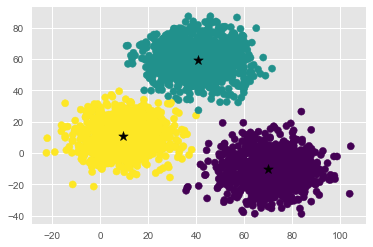

In [4]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='*',s=100, alpha=1)

In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

dataset = pd.read_csv(url, names=names) 
X = dataset.iloc[:, :-1].values 

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [7]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [8]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [9]:
y = dataset.iloc[:, 4].values 
y_laber = []
for id in y:
    if 'Iris-setosa' == id:
        y_laber.append(1)
    if 'Iris-versicolor' == id:
        y_laber.append(0)
    if 'Iris-virginica' == id:
        y_laber.append(2)    

In [10]:
from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_laber, y_kmeans))  
print(classification_report(y_laber, y_kmeans))

[[48  0  2]
 [ 0 50  0]
 [14  0 36]]
             precision    recall  f1-score   support

          0       0.77      0.96      0.86        50
          1       1.00      1.00      1.00        50
          2       0.95      0.72      0.82        50

avg / total       0.91      0.89      0.89       150

